In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("hello wordl")

hello wordl


In [3]:
Image_size =256
Batch_size = 32
channels = 3
epochs = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"C:\\Users\\Arush\\potato-disease\\training\\Potato_set",
    labels='inferred',
    # label_mode='int',
    # class_names=class_names,
    seed=123,
    color_mode='rgb',
    batch_size=Batch_size,
    image_size=(Image_size, Image_size),
    shuffle = True
    )

Found 2515 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)
print(len(dataset)*32)
#it shows the number of batches created and each batch having 32 images in it

2528


In [7]:
c=0
for images ,labels in dataset.take(1):
  print(images.numpy())
  print(labels.numpy())
  c+=1
print(c)

[[[[206. 201. 198.]
   [204. 199. 196.]
   [201. 196. 193.]
   ...
   [213. 208. 212.]
   [202. 197. 201.]
   [203. 198. 202.]]

  [[211. 206. 203.]
   [208. 203. 200.]
   [205. 200. 197.]
   ...
   [211. 206. 210.]
   [200. 195. 199.]
   [202. 197. 201.]]

  [[212. 207. 204.]
   [209. 204. 201.]
   [206. 201. 198.]
   ...
   [208. 203. 207.]
   [199. 194. 198.]
   [203. 198. 202.]]

  ...

  [[156. 145. 149.]
   [153. 142. 146.]
   [150. 139. 143.]
   ...
   [155. 145. 153.]
   [153. 143. 151.]
   [156. 146. 154.]]

  [[153. 142. 146.]
   [149. 138. 142.]
   [148. 137. 141.]
   ...
   [152. 142. 150.]
   [149. 139. 147.]
   [154. 144. 152.]]

  [[173. 162. 166.]
   [164. 153. 157.]
   [153. 142. 146.]
   ...
   [153. 143. 151.]
   [150. 140. 148.]
   [154. 144. 152.]]]


 [[[ 67.  63.  78.]
   [109. 105. 120.]
   [100.  96. 111.]
   ...
   [157. 158. 176.]
   [158. 159. 177.]
   [158. 159. 177.]]

  [[100.  96. 111.]
   [134. 130. 145.]
   [138. 134. 149.]
   ...
   [157. 158. 176.]
 

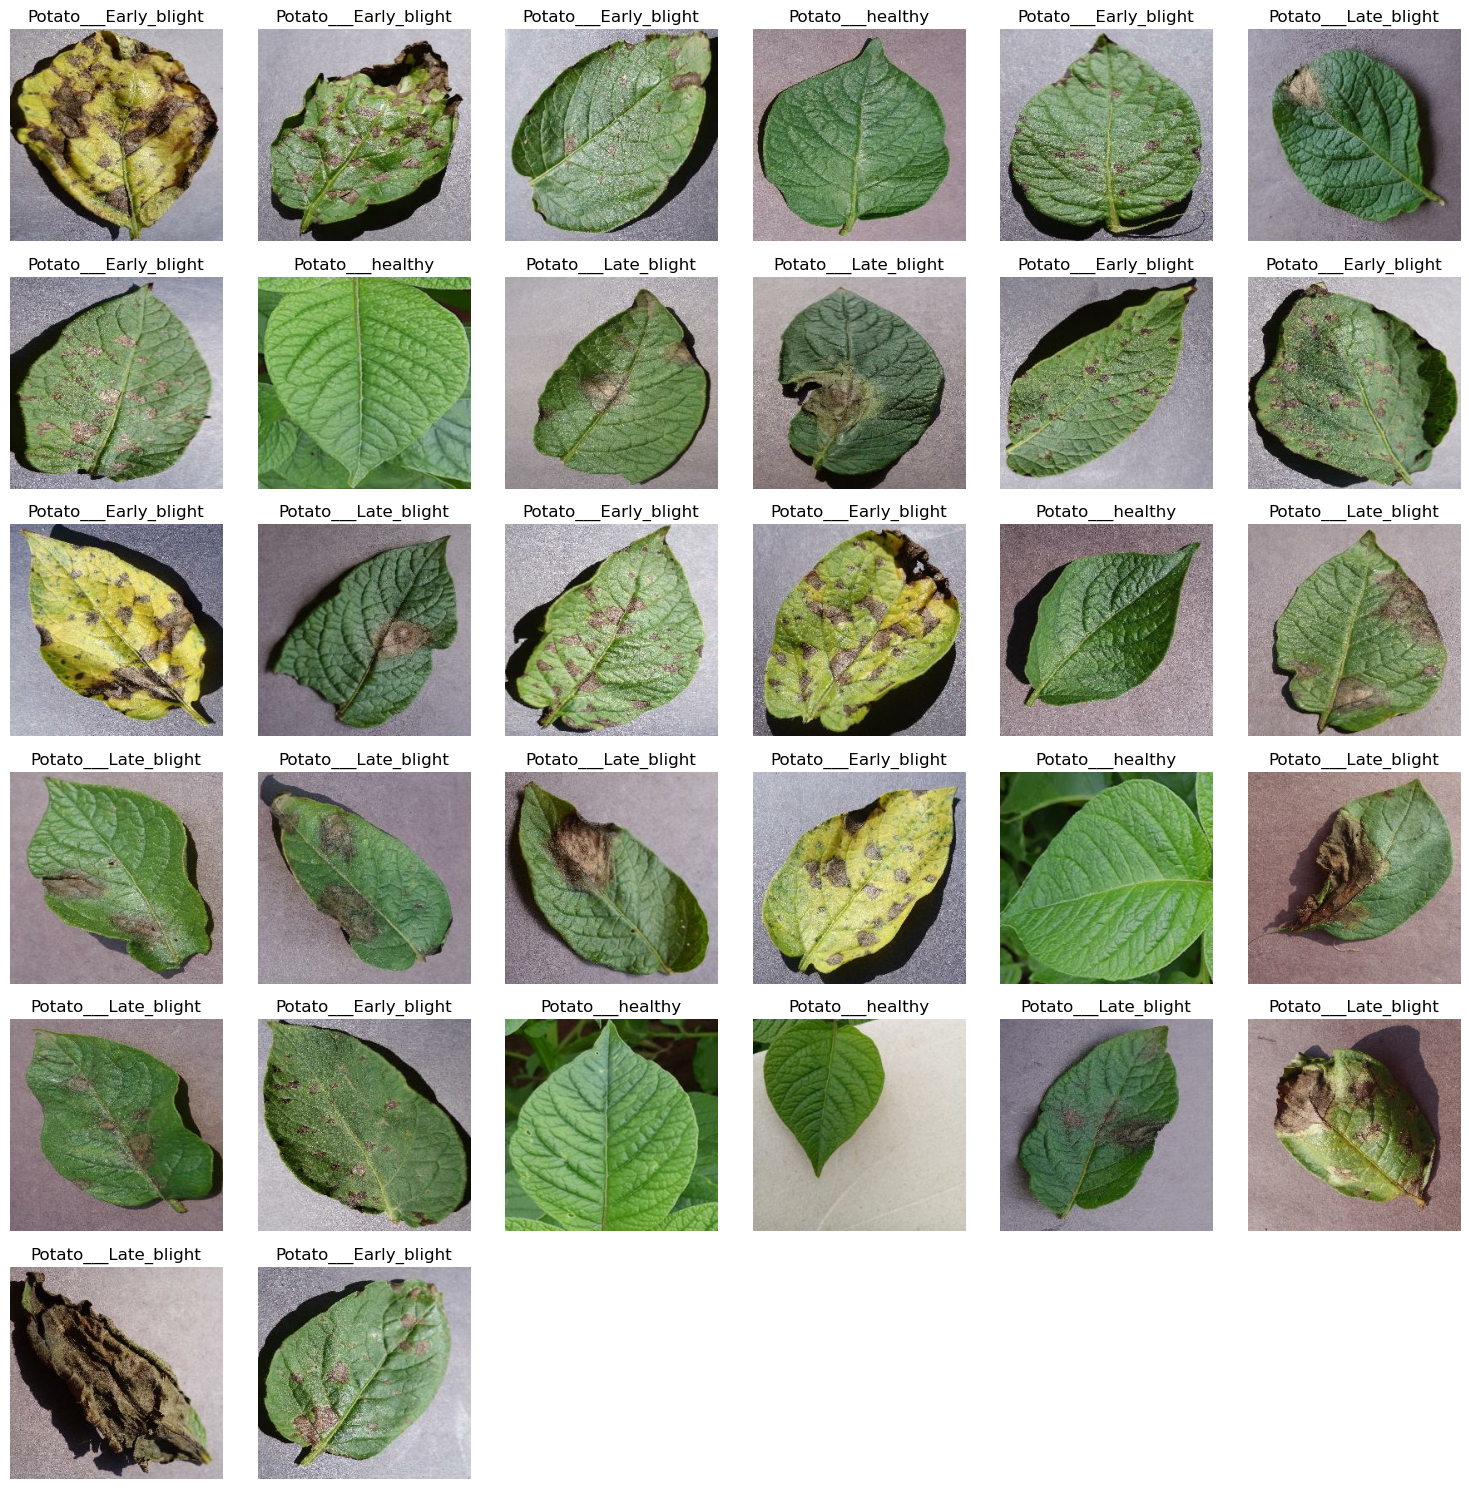

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))  # Adjust figure size as needed

for images, labels in dataset.take(1):
  for i in range(images.shape[0]):
    ax = plt.subplot(6, 6, i + 1)  # Create subplots in a 6x6 grid
    image = images[i].numpy().astype("uint8")
    plt.imshow(image)
    plt.title(class_names[labels[i]])
    plt.axis("off")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

80 % tarining , 20 % testing

In [10]:
train_size =0.8
len(dataset)*train_size


63.2

It means that, out of all batches, 63 batches will be taken for the training task

In [12]:
train_ds = dataset.take(63)
len(train_ds)

63

In [13]:
test_ds =dataset.skip(63)
len(test_ds)

16

In [14]:
val_size =0.1
len(dataset)*val_size

7.9

In [15]:
val_ds = test_ds.take(7)
len(val_ds)

7

In [16]:
test_ds = test_ds.skip(7)
len(test_ds)

9

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size = int (len(ds)*train_split)
  val_size = int (len(ds)*val_split)
  test_size = int (len(ds)*test_split)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds =val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

Data augmentation

In [21]:
resize_and_rescale = tf.keras.Sequential(
    [layers.Resizing(Image_size,Image_size),layers.Rescaling(1.0/255)]
)

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers

Image_size = 256
channels = 3
n_classes = 3  # Number of classes: healthy, late_blight, early_blight

# Define resize_and_rescale and data_augmentation as layers
resize_and_rescale = layers.Rescaling(1./255)  # Example of a rescaling layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Create the Sequential model
model = models.Sequential([
    resize_and_rescale,  # Rescaling layer
    data_augmentation,    # Data augmentation layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),  # Output layer with 3 units
])

# Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [24]:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=Batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=35,
)

Epoch 1/35
63/63 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.4397 - loss: 0.9695 - val_accuracy: 0.7232 - val_loss: 0.6135
Epoch 2/35
63/63 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7887 - loss: 0.4805 - val_accuracy: 0.7768 - val_loss: 0.5650
Epoch 3/35
63/63 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8279 - loss: 0.4342 - val_accuracy: 0.8884 - val_loss: 0.2654
Epoch 4/35
63/63 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9067 - loss: 0.2317 - val_accuracy: 0.9464 - val_loss: 0.1620
Epoch 5/35
63/63 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9221 - loss: 0.1962 - val_accuracy: 0.8839 - val_loss: 0.2767
Epoch 6/35
53/63 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9570 - loss: 0.1320

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
acc.shape

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model.save(r'C:\Users\Arush\potato-disease\models\m2.keras')